In [69]:
import pandas as pd
from common import rank_order, get_all_data
from scipy import stats
from scipy.stats import ttest_ind, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load all preprocessed data
players, ranked_matches, ranked_player_match_data, swiftplay_matches, swiftplay_player_match_data = get_all_data()


/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/4184591277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_dead_time = swiftplay_player_match_data.groupby("full_rank")["totalTimeSpentDead"].mean().reindex(rank_order)


<Axes: title={'center': 'Average Time Spent Dead by Rank in Swiftplay'}, xlabel='full_rank'>

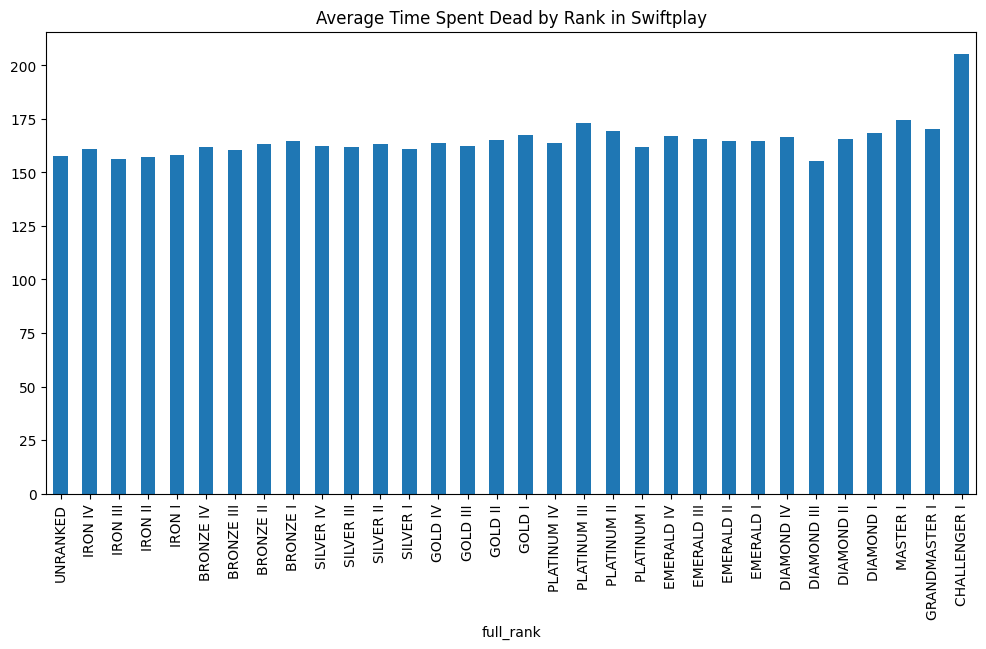

In [42]:
avg_dead_time = swiftplay_player_match_data.groupby("full_rank")["totalTimeSpentDead"].mean().reindex(rank_order)

avg_dead_time.plot(kind='bar', title="Average Time Spent Dead by Rank in Swiftplay", figsize=(12, 6))

/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/754696347.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_dead_time = ranked_player_match_data.groupby("full_rank")["totalTimeSpentDead"].mean().reindex(rank_order)


<Axes: title={'center': 'Average Time Spent Dead by Rank in Ranked'}, xlabel='full_rank'>

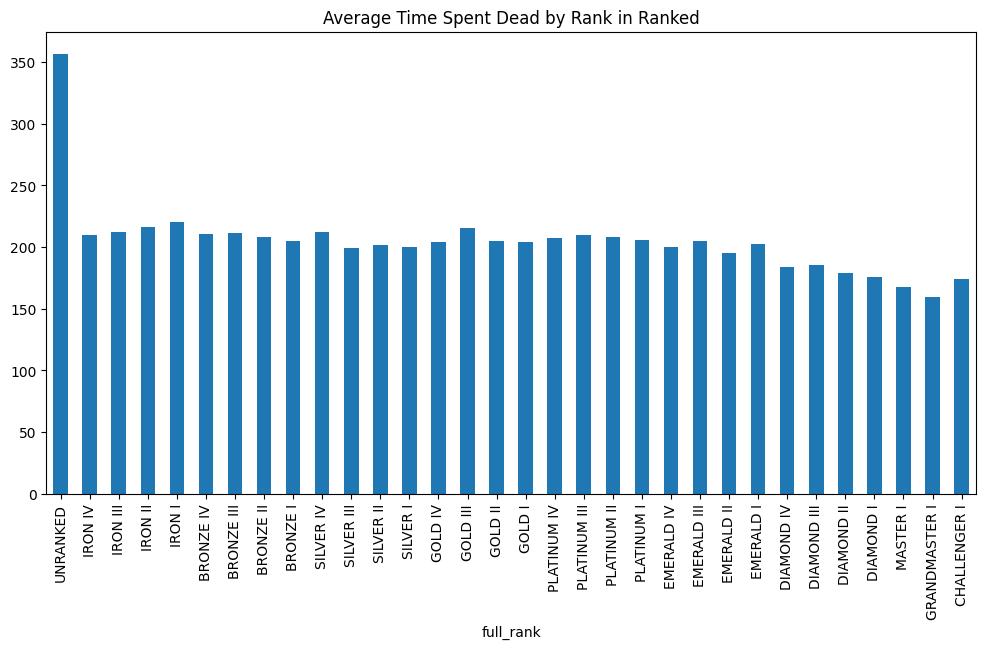

In [43]:
avg_dead_time = ranked_player_match_data.groupby("full_rank")["totalTimeSpentDead"].mean().reindex(rank_order)

avg_dead_time.plot(kind='bar', title="Average Time Spent Dead by Rank in Ranked", figsize=(12, 6))

/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/2134171150.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sp = (swiftplay_player_match_data["totalTimeSpentDead"] / swiftplay_player_match_data["timePlayed"] * 100).groupby(swiftplay_player_match_data["full_rank"]).mean().reindex(rank_order)
/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/2134171150.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rk = (ranked_player_match_data["totalTimeSpentDead"] / ranked_player_match_data["timePlayed"] * 100).groupby(ranked_player_match_data["full_rank"]).mean().reindex(rank_order)


<Axes: title={'center': 'Percent Time Spent Dead (Ranked vs. SwiftPlay)'}, xlabel='full_rank', ylabel='% Time Dead'>

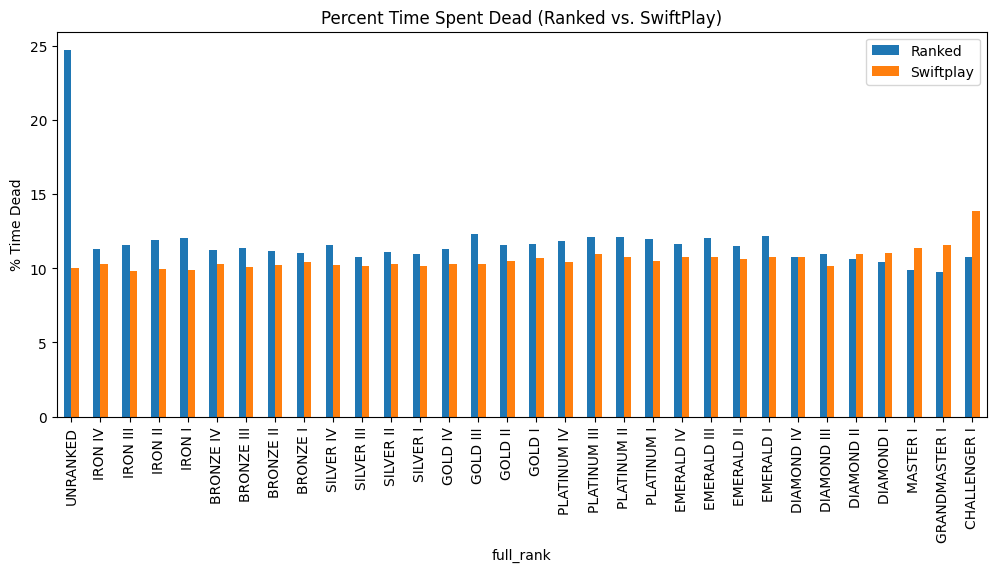

In [44]:
sp = (swiftplay_player_match_data["totalTimeSpentDead"] / swiftplay_player_match_data["timePlayed"] * 100).groupby(swiftplay_player_match_data["full_rank"]).mean().reindex(rank_order)
rk = (ranked_player_match_data["totalTimeSpentDead"] / ranked_player_match_data["timePlayed"] * 100).groupby(ranked_player_match_data["full_rank"]).mean().reindex(rank_order)

pd.DataFrame({"Ranked": rk, "Swiftplay": sp}).plot(kind="bar", figsize=(12, 5), title="Percent Time Spent Dead (Ranked vs. SwiftPlay)", ylabel="% Time Dead")


/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/60005163.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sp = swift_merged.groupby("full_rank")["gameEndedInEarlySurrender"].mean().reindex(rank_order)
/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/60005163.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rk = ranked_merged.groupby("full_rank")["gameEndedInEarlySurrender"].mean().reindex(rank_order)


<Axes: title={'center': 'Early Surrender Rate by Rank (Ranked vs Swiftplay)'}, xlabel='full_rank', ylabel='Early Surrender Rate (%)'>

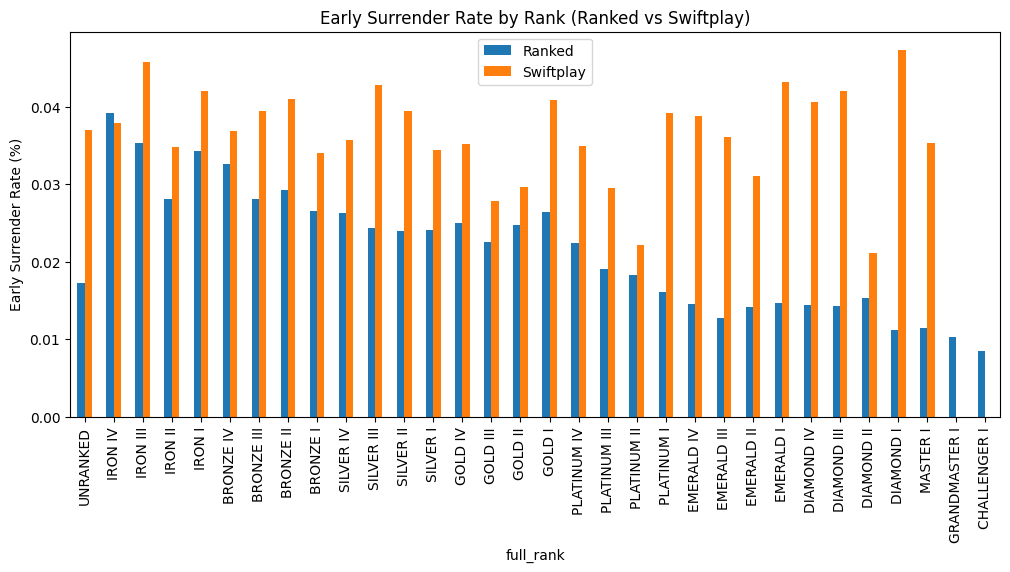

In [45]:
ranked_merged = pd.merge(ranked_player_match_data, ranked_matches, on="matchId")
swift_merged = pd.merge(swiftplay_player_match_data, swiftplay_matches, on="matchId")

sp = swift_merged.groupby("full_rank")["gameEndedInEarlySurrender"].mean().reindex(rank_order)
rk = ranked_merged.groupby("full_rank")["gameEndedInEarlySurrender"].mean().reindex(rank_order)

pd.DataFrame({"Ranked": rk, "Swiftplay": sp}).plot(
    kind="bar", figsize=(12, 5),
    title="Early Surrender Rate by Rank (Ranked vs Swiftplay)",
    ylabel="Early Surrender Rate (%)"
)

/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/3576243307.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sp = swift_merged.groupby("full_rank")["gameEndedInSurrender"].mean().reindex(rank_order)
/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/3576243307.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rk = ranked_merged.groupby("full_rank")["gameEndedInSurrender"].mean().reindex(rank_order)


<Axes: title={'center': 'Surrender Rate by Rank (Ranked vs Swiftplay)'}, xlabel='full_rank', ylabel='Surrender Rate (%)'>

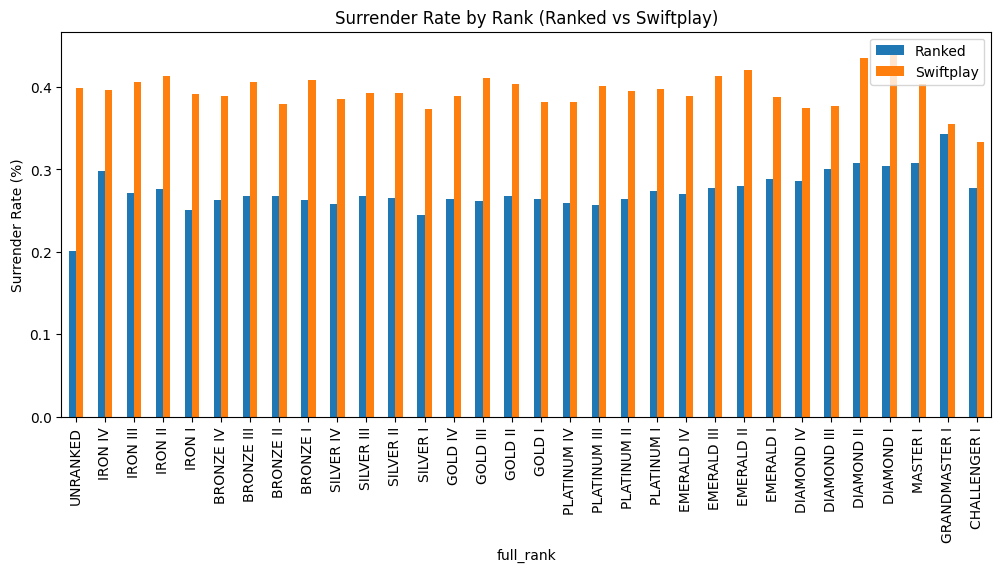

In [46]:
ranked_merged = pd.merge(ranked_player_match_data, ranked_matches, on="matchId")
swift_merged = pd.merge(swiftplay_player_match_data, swiftplay_matches, on="matchId")

sp = swift_merged.groupby("full_rank")["gameEndedInSurrender"].mean().reindex(rank_order)
rk = ranked_merged.groupby("full_rank")["gameEndedInSurrender"].mean().reindex(rank_order)

pd.DataFrame({"Ranked": rk, "Swiftplay": sp}).plot(
    kind="bar", figsize=(12, 5),
    title="Surrender Rate by Rank (Ranked vs Swiftplay)",
    ylabel="Surrender Rate (%)"
)

In [47]:
proportion_early_surrender_sp = (
    swiftplay_matches["gameEndedInEarlySurrender"].sum() / len(swiftplay_matches)
)

proportion_surrender_sp = (
    swiftplay_matches["gameEndedInSurrender"].sum() / len(swiftplay_matches)
)

proportion_early_surrender_r = (
    ranked_matches["gameEndedInEarlySurrender"].sum() / len(ranked_matches)
)

proportion_surrender_r = (
    ranked_matches["gameEndedInSurrender"].sum() / len(ranked_matches)
)

print(f"Proportion of early surrenders in Swiftplay: {proportion_early_surrender_sp}")
print(f"Proportion of surrenders in Swiftplay: {proportion_surrender_sp}")
print(f"Proportion of early surrenders in Ranked: {proportion_early_surrender_r}")
print(f"Proportion of surrenders in Ranked: {proportion_surrender_r}")

Proportion of early surrenders in Swiftplay: 0.03698445375168595
Proportion of surrenders in Swiftplay: 0.39674877546674236
Proportion of early surrenders in Ranked: 0.022570150467669785
Proportion of surrenders in Ranked: 0.2623017486783245


In [48]:
avg_game_duration_sp = swiftplay_matches["gameDuration"].mean() / 60
avg_game_duration_r = ranked_matches["gameDuration"].mean() / 60

print(f"Average game duration in Swiftplay: {avg_game_duration_sp}")
print(f"Average game duration in Ranked: {avg_game_duration_r}")

avg_game_duration__surrender_sp = swiftplay_matches[swiftplay_matches["gameEndedInEarlySurrender"]]["gameDuration"].mean() / 60
avg_game_duration__surrender_r = ranked_matches[ranked_matches["gameEndedInEarlySurrender"]]["gameDuration"].mean() / 60

print(f"Average game duration in Swiftplay when early surrendered: {avg_game_duration__surrender_sp}")
print(f"Average game duration in Ranked when early surrendered: {avg_game_duration__surrender_r}")

avg_game_duration__surrender_sp = swiftplay_matches[swiftplay_matches["gameEndedInSurrender"]]["gameDuration"].mean() / 60
avg_game_duration__surrender_r = ranked_matches[ranked_matches["gameEndedInSurrender"]]["gameDuration"].mean() / 60

print(f"Average game duration in Swiftplay when normal surrendered: {avg_game_duration__surrender_sp}")
print(f"Average game duration in Ranked when normal surrendered: {avg_game_duration__surrender_r}")

Average game duration in Swiftplay: 23.7985329263387
Average game duration in Ranked: 28.753472504631514
Average game duration in Swiftplay when early surrendered: 2.0301983365323095
Average game duration in Ranked when early surrendered: 1.9883633633633633
Average game duration in Swiftplay when normal surrendered: 21.04325460726427
Average game duration in Ranked when normal surrendered: 24.36958225667528


In [49]:
avg_game_duration_sp = swiftplay_matches["gameDuration"].median() / 60
avg_game_duration_r = ranked_matches["gameDuration"].median() / 60

print(f"Median game duration in Swiftplay: {avg_game_duration_sp}")
print(f"Median game duration in Ranked: {avg_game_duration_r}")

avg_game_duration__surrender_sp = swiftplay_matches[swiftplay_matches["gameEndedInEarlySurrender"]]["gameDuration"].median() / 60
avg_game_duration__surrender_r = ranked_matches[ranked_matches["gameEndedInEarlySurrender"]]["gameDuration"].median() / 60

print(f"Median game duration in Swiftplay when early surrendered: {avg_game_duration__surrender_sp}")
print(f"Median game duration in Ranked when early surrendered: {avg_game_duration__surrender_r}")

avg_game_duration__surrender_sp = swiftplay_matches[swiftplay_matches["gameEndedInSurrender"]]["gameDuration"].median() / 60
avg_game_duration__surrender_r = ranked_matches[ranked_matches["gameEndedInSurrender"]]["gameDuration"].median() / 60

print(f"Median game duration in Swiftplay when normal surrendered: {avg_game_duration__surrender_sp}")
print(f"Median game duration in Ranked when normal surrendered: {avg_game_duration__surrender_r}")



Median game duration in Swiftplay: 24.633333333333333
Median game duration in Ranked: 29.133333333333333
Median game duration in Swiftplay when early surrendered: 1.8666666666666667
Median game duration in Ranked when early surrendered: 1.8166666666666667
Median game duration in Swiftplay when normal surrendered: 20.566666666666666
Median game duration in Ranked when normal surrendered: 24.0


In [ ]:
# Is Time Spent Dead Significantly Different Between Ranked and Swiftplay?
# H₀: No difference in mean time spent dead between both game modes.
# Ha: Time spent dead differs between both game modes.
ttest_ind(
    ranked_player_match_data["totalTimeSpentDead"],
    swiftplay_player_match_data["totalTimeSpentDead"],
    equal_var=False  
)

TtestResult(statistic=np.float64(105.78792105277275), pvalue=np.float64(0.0), df=np.float64(416728.84387776017))

In [ ]:
# H₀: No difference in mean time spent dead between both game modes.
# Ha: Swiftplay has a lower mean time spent dead than Ranked.
ranked_dead = ranked_player_match_data["totalTimeSpentDead"]
swift_dead = swiftplay_player_match_data["totalTimeSpentDead"]

t_stat, p_two_tailed = ttest_ind(ranked_dead, swift_dead, equal_var=False)

if t_stat > 0:
    p_one_tailed = p_two_tailed / 2
else:
    p_one_tailed = 1 - (p_two_tailed / 2)

print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed p-value (Ranked > Swiftplay): {p_one_tailed:.20f}")

T-statistic: 105.7879
One-tailed p-value (Ranked > Swiftplay): 0.00000000000000000000


/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/1189094548.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dead_time_df, x="GameMode", y="TimeSpentDead", inner="quartile", palette="Set2")


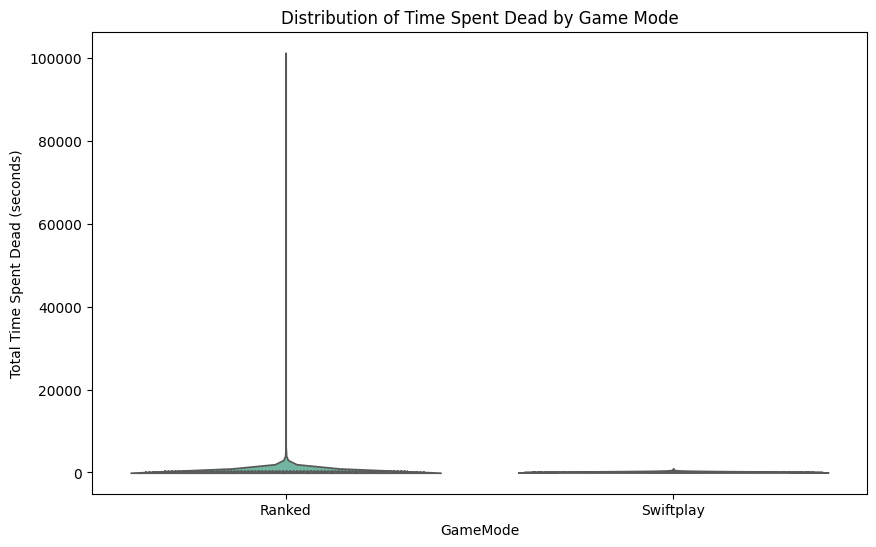

In [ ]:
dead_time_df = pd.DataFrame({
    "TimeSpentDead": pd.concat([ranked_dead, swift_dead], ignore_index=True),
    "GameMode": ["Ranked"] * len(ranked_dead) + ["Swiftplay"] * len(swift_dead)
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=dead_time_df, x="GameMode", y="TimeSpentDead", inner="quartile", palette="Set2")
plt.title("Distribution of Time Spent Dead by Game Mode")
plt.ylabel("Total Time Spent Dead (seconds)")
plt.show()

/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/4065374770.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dead_time_df_filtered, x="GameMode", y="TimeSpentDead", inner="quartile", palette="Set2")


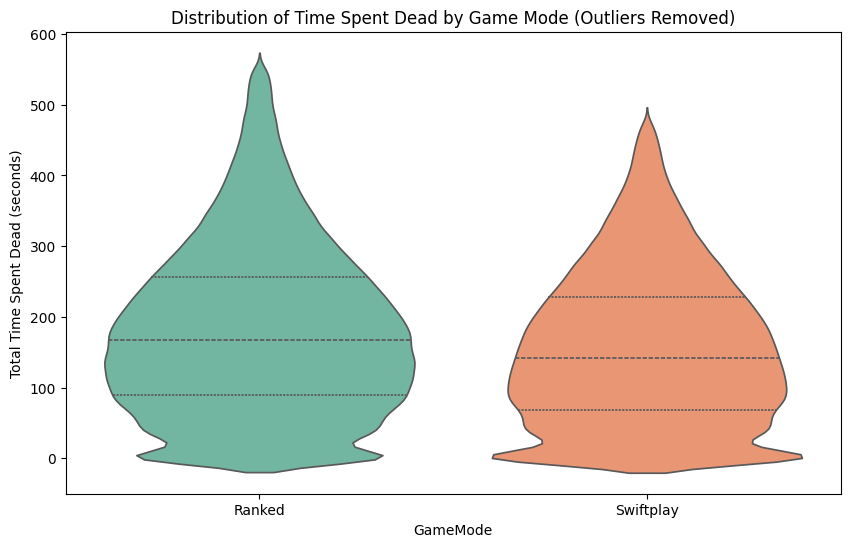

In [ ]:
dead_time_df = pd.DataFrame({
    "TimeSpentDead": pd.concat([ranked_dead, swift_dead], ignore_index=True),
    "GameMode": ["Ranked"] * len(ranked_dead) + ["Swiftplay"] * len(swift_dead)
})

def remove_outliers_iqr(df, group_col, value_col):
    filtered = []
    for mode in df[group_col].unique():
        group_data = df[df[group_col] == mode]
        Q1 = group_data[value_col].quantile(0.25)
        Q3 = group_data[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        filtered_group = group_data[(group_data[value_col] >= lower) & (group_data[value_col] <= upper)]
        filtered.append(filtered_group)
    return pd.concat(filtered)

dead_time_df_filtered = remove_outliers_iqr(dead_time_df, "GameMode", "TimeSpentDead")

plt.figure(figsize=(10, 6))
sns.violinplot(data=dead_time_df_filtered, x="GameMode", y="TimeSpentDead", inner="quartile", palette="Set2")
plt.title("Distribution of Time Spent Dead by Game Mode (Outliers Removed)")
plt.ylabel("Total Time Spent Dead (seconds)")
plt.show()

/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/1270006681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dead_time_df, x="GameMode", y="TimeSpentDead", palette="Set3")


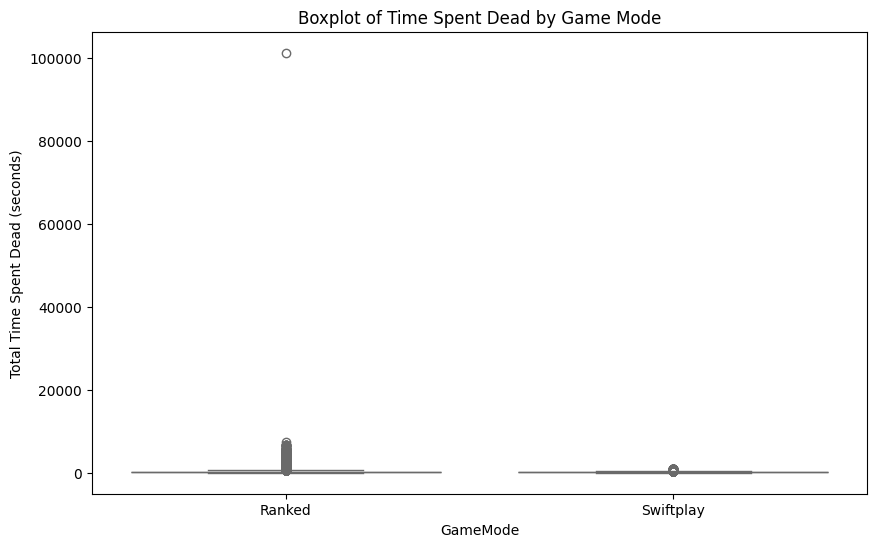

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dead_time_df, x="GameMode", y="TimeSpentDead", palette="Set3")
plt.title("Boxplot of Time Spent Dead by Game Mode")
plt.ylabel("Total Time Spent Dead (seconds)")
plt.show()

/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/4253903847.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dead_time_df_filtered, x="GameMode", y="TimeSpentDead", palette="Set3")


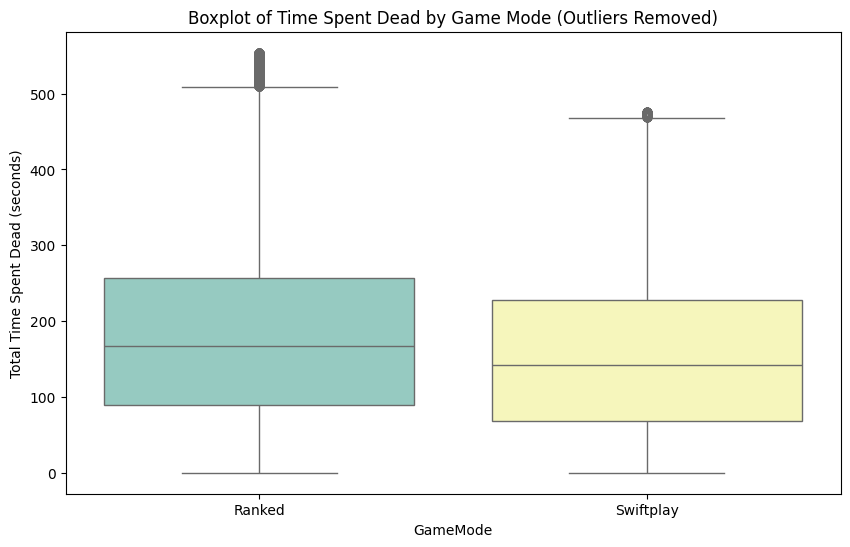

In [ ]:
def remove_outliers_iqr(df, group_col, value_col):
    filtered = []
    for mode in df[group_col].unique():
        group_data = df[df[group_col] == mode]
        Q1 = group_data[value_col].quantile(0.25)
        Q3 = group_data[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        filtered_group = group_data[(group_data[value_col] >= lower) & (group_data[value_col] <= upper)]
        filtered.append(filtered_group)
    return pd.concat(filtered)

dead_time_df_filtered = remove_outliers_iqr(dead_time_df, "GameMode", "TimeSpentDead")

plt.figure(figsize=(10, 6))
sns.boxplot(data=dead_time_df_filtered, x="GameMode", y="TimeSpentDead", palette="Set3")
plt.title("Boxplot of Time Spent Dead by Game Mode (Outliers Removed)")
plt.ylabel("Total Time Spent Dead (seconds)")
plt.show()


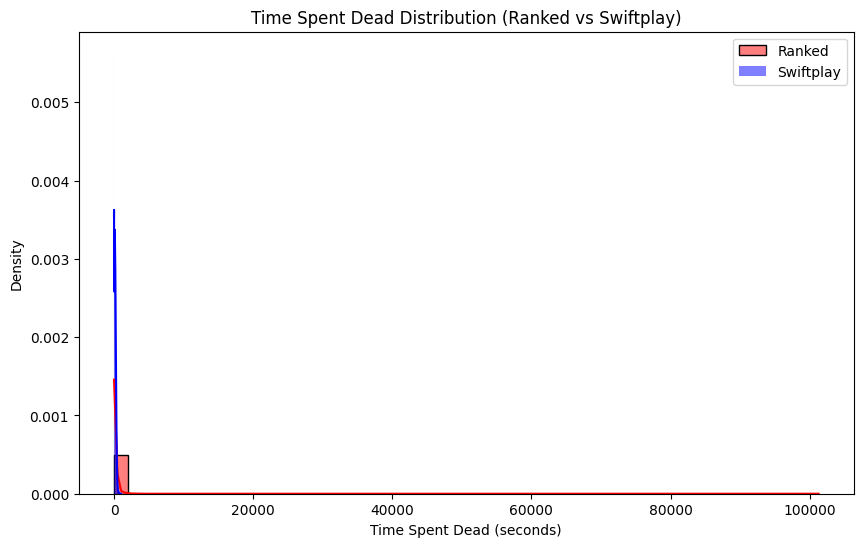

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(ranked_dead, color="red", label="Ranked", kde=True, stat="density", bins=50, alpha=0.5)
sns.histplot(swift_dead, color="blue", label="Swiftplay", kde=True, stat="density", bins=50, alpha=0.5)
plt.legend()
plt.title("Time Spent Dead Distribution (Ranked vs Swiftplay)")
plt.xlabel("Time Spent Dead (seconds)")
plt.ylabel("Density")
plt.show()

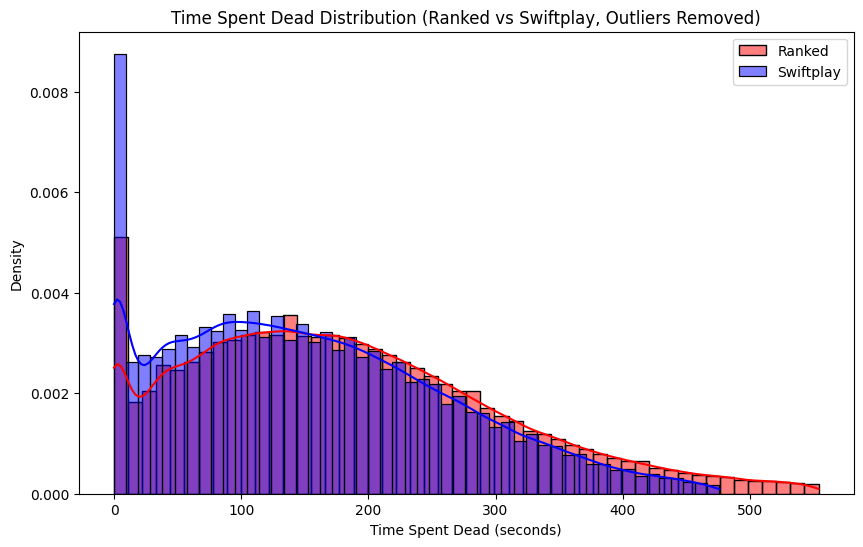

In [63]:
def filter_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

ranked_dead_filtered = filter_outliers(ranked_dead)
swift_dead_filtered = filter_outliers(swift_dead)

plt.figure(figsize=(10, 6))
sns.histplot(ranked_dead_filtered, color="red", label="Ranked", kde=True, stat="density", bins=50, alpha=0.5)
sns.histplot(swift_dead_filtered, color="blue", label="Swiftplay", kde=True, stat="density", bins=50, alpha=0.5)
plt.legend()
plt.title("Time Spent Dead Distribution (Ranked vs Swiftplay, Outliers Removed)")
plt.xlabel("Time Spent Dead (seconds)")
plt.ylabel("Density")
plt.show()

In [ ]:
# Is Surrender Rate Independent of Game Mode?
# H₀: Surrender rate is independent of game mode.
# Ha: Surrender rate does depend on the game mode.

surrender_counts = pd.DataFrame({
    "Ranked": [
        ranked_matches["gameEndedInSurrender"].sum(),
        len(ranked_matches) - ranked_matches["gameEndedInSurrender"].sum()
    ],
    "Swiftplay": [
        swiftplay_matches["gameEndedInSurrender"].sum(),
        len(swiftplay_matches) - swiftplay_matches["gameEndedInSurrender"].sum()
    ]
}, index=["Surrendered", "Not Surrendered"])

# Chi-squared test
stats.chi2_contingency(surrender_counts)

Chi2ContingencyResult(statistic=np.float64(811.3457013233322), pvalue=np.float64(1.842141362405542e-178), dof=1, expected_freq=array([[ 9021.95508659,  4307.04491341],
       [20486.04491341,  9779.95508659]]))

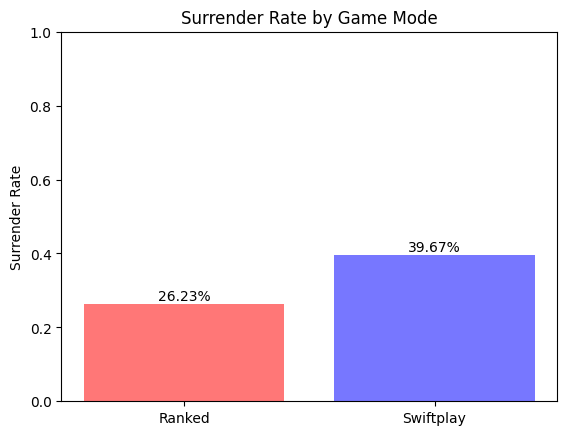

In [55]:
surrender_rate_ranked = ranked_matches["gameEndedInSurrender"].mean()
surrender_rate_swift = swiftplay_matches["gameEndedInSurrender"].mean()

plt.bar(["Ranked", "Swiftplay"], [surrender_rate_ranked, surrender_rate_swift], color=["#f77", "#77f"])
plt.title("Surrender Rate by Game Mode")
plt.ylabel("Surrender Rate")
plt.ylim(0, 1)
plt.text(0, surrender_rate_ranked + 0.01, f"{surrender_rate_ranked:.2%}", ha="center")
plt.text(1, surrender_rate_swift + 0.01, f"{surrender_rate_swift:.2%}", ha="center")
plt.show()

In [ ]:
# ANOVA: Does Average KDA Differ Across Ranks?
groups = []
for tier in ranked_player_match_data["tier"].unique():
    df = ranked_player_match_data[ranked_player_match_data["tier"] == tier]

    safe_kd = df["kills"] / df["deaths"].replace(0, np.nan)
    safe_kd = safe_kd.dropna()

    if len(safe_kd) > 1:
        groups.append(safe_kd)

if len(groups) >= 2:
    result = f_oneway(*groups)
    print(result)

F_onewayResult(statistic=np.float64(67.53411746962863), pvalue=np.float64(1.8088291874181957e-138))


In [ ]:
ranked_kd = ranked_player_match_data["kills"] / ranked_player_match_data["deaths"].replace(0, np.nan)
tukey_data = pd.DataFrame({
    "kd": ranked_kd,
    "tier": ranked_player_match_data["tier"]
}).dropna()

tukey_result = pairwise_tukeyhsd(endog=tukey_data["kd"], groups=tukey_data["tier"], alpha=0.05)
print(tukey_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
     BRONZE  CHALLENGER    0.267  0.883 -0.2702  0.8041  False
     BRONZE     DIAMOND   0.1805    0.0  0.1294  0.2315   True
     BRONZE     EMERALD   0.1322    0.0  0.0886  0.1758   True
     BRONZE        GOLD   0.1216    0.0   0.082  0.1613   True
     BRONZE GRANDMASTER   0.3345 0.0025   0.069  0.6001   True
     BRONZE        IRON  -0.1756    0.0  -0.227 -0.1241   True
     BRONZE      MASTER   0.2807    0.0   0.196  0.3654   True
     BRONZE    PLATINUM   0.1207    0.0  0.0781  0.1633   True
     BRONZE      SILVER   0.0727    0.0  0.0349  0.1106   True
     BRONZE    UNRANKED   0.0332 0.1132 -0.0033  0.0697  False
 CHALLENGER     DIAMOND  -0.0865    1.0 -0.6246  0.4516  False
 CHALLENGER     EMERALD  -0.1348 0.9993 -0.6722  0.4027  False
 CHALLENGER        GOLD  -0.1453 0.9987 -0.6825  0.3918

/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/1272919025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=kd_by_tier_df, x="Tier", y="KDRatio", palette="Pastel1")


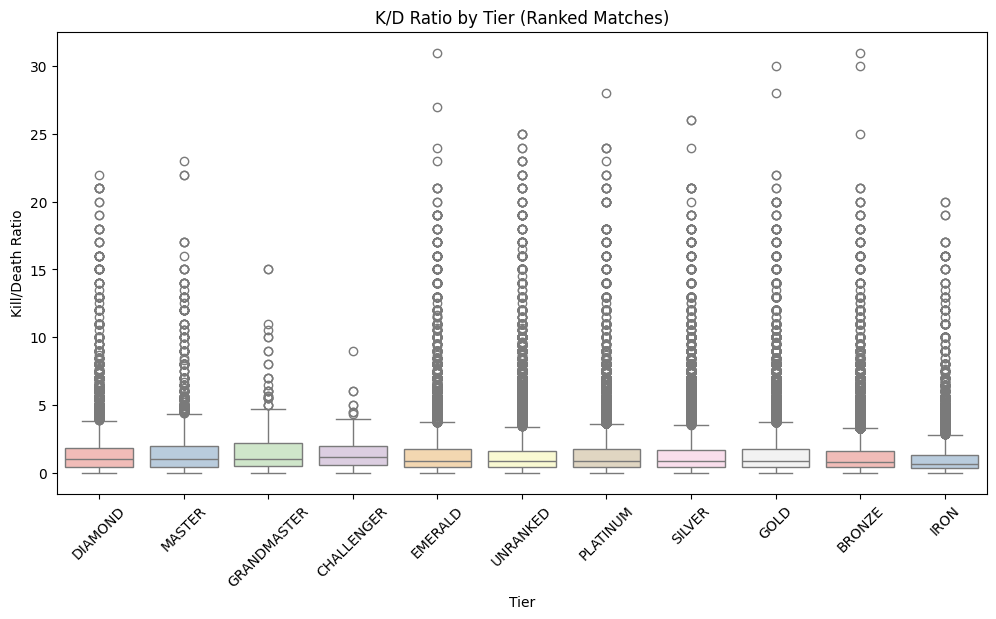

In [72]:
ranked_kd = ranked_player_match_data["kills"] / ranked_player_match_data["deaths"].replace(0, np.nan)

kd_by_tier_df = pd.DataFrame({
    "KDRatio": ranked_kd,
    "Tier": ranked_player_match_data["tier"]
}).dropna()

plt.figure(figsize=(12, 6))
sns.boxplot(data=kd_by_tier_df, x="Tier", y="KDRatio", palette="Pastel1")
plt.title("K/D Ratio by Tier (Ranked Matches)")
plt.ylabel("Kill/Death Ratio")
plt.xlabel("Tier")
plt.xticks(rotation=45)
plt.show()

/var/folders/hn/12v67s296f3ckbpy52z8xn0h0000gn/T/ipykernel_23982/560257554.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=kd_filtered, x="Tier", y="KDRatio", palette="Pastel1")


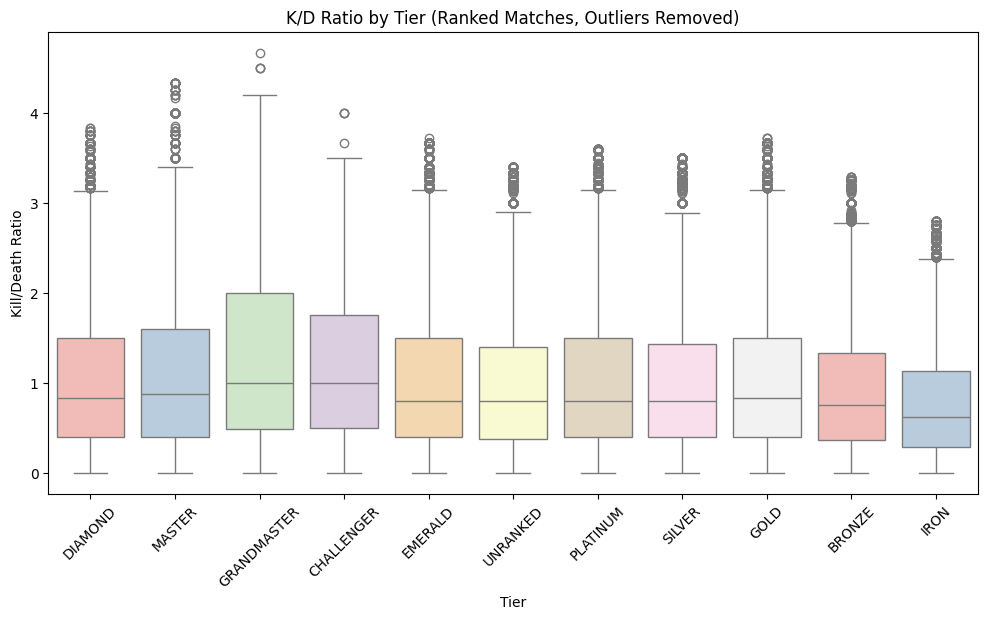

In [73]:
def remove_outliers_iqr(df, group_col, value_col):
    filtered = []
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group]
        Q1 = group_data[value_col].quantile(0.25)
        Q3 = group_data[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        filtered_group = group_data[(group_data[value_col] >= lower) & (group_data[value_col] <= upper)]
        filtered.append(filtered_group)
    return pd.concat(filtered)

kd_filtered = remove_outliers_iqr(kd_by_tier_df, "Tier", "KDRatio")

plt.figure(figsize=(12, 6))
sns.boxplot(data=kd_filtered, x="Tier", y="KDRatio", palette="Pastel1")
plt.title("K/D Ratio by Tier (Ranked Matches, Outliers Removed)")
plt.ylabel("Kill/Death Ratio")
plt.xlabel("Tier")
plt.xticks(rotation=45)
plt.show()